In [607]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [899]:
# Read csv file
cases = pd.read_csv('../STA 141C/Cases_Subset.csv', sep = ",", dtype = "str")

In [900]:
# Drop extra columns
cases = cases.drop(cases.columns[range(20,47)], axis = 1)

# Date Columns
date_columns = ["Opened", "Closed", "Updated"]

# Convert specified columns into datetime format
cases[date_columns] = cases[date_columns].apply(pd.to_datetime, format = "%m/%d/%Y %I:%M:%S %p")

# Find Closed - Opened
time_elapsed = (cases["Closed"] - cases["Opened"])

# Insert Time Elapsed into cases df
cases.insert(3, "Time Elapsed", time_elapsed)

In [901]:
# Question 3: given the request type, what is the predicted time of day

# subset data
cases_q3 = cases.drop(['Request Details','Media URL','CaseID','Closed','Time Elapsed','Updated',
                       'Status Notes','Point','Address'], axis=1)

In [902]:
# separate by day and night 
# day = 0; night = 1
cases_q3 = cases_q3.set_index(pd.to_datetime(cases_q3['Opened']))
cases_q3["day_night"] = 1

In [903]:
cases_q3.loc[cases_q3.between_time("06:00", "18:00").index, "day_night"] = 0

In [904]:
cases_q3["day_night"].value_counts()

0    1527
1     473
Name: day_night, dtype: int64

In [905]:
# dummy variables for categorical columns
status = pd.get_dummies(cases_q3['Status'],drop_first=True)
category = pd.get_dummies(cases_q3['Category'],drop_first=True)
request = pd.get_dummies(cases_q3['Request Type'],drop_first=True)
agency = pd.get_dummies(cases_q3['Responsible Agency'],drop_first=True)
street = pd.get_dummies(cases_q3['Street'],drop_first=True)
supervisor = pd.get_dummies(cases_q3['Supervisor District'],drop_first=True)
neighbor = pd.get_dummies(cases_q3['Neighborhood'],drop_first=True)
police = pd.get_dummies(cases_q3['Police District'],drop_first=True)
source = pd.get_dummies(cases_q3['Source'],drop_first=True)

In [906]:
df_cases = pd.concat([cases_q3,status,category,request,agency,street,supervisor,neighbor,police,source],axis=1)

In [907]:
df_cases

,Opened,Status,Responsible Agency,Category,Request Type,Street,Supervisor District,Neighborhood,Police District,Latitude,...,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN,Mobile/Open311,Other Department,Phone,Twitter,Web
Opened,,,,,,,,,,,,,,,,,,,,,
2019-03-19 16:44:32,2019-03-19 16:44:32,Open,DPW BSM Queue,Sidewalk or Curb,Sidewalk_Defect,MISSISSIPPI ST,10,Potrero Hill,BAYVIEW,37.76156,...,0,0,0,0,0,0,0,0,0,1
2019-04-09 07:08:53,2019-04-09 07:08:53,Open,DPW BSM Queue,Sidewalk or Curb,Sidewalk_Defect,GOUGH ST,5,Cathedral Hill,NORTHERN,37.786767,...,0,0,0,0,0,1,0,0,0,0
2019-05-21 16:11:00,2019-05-21 16:11:00,Closed,DPW BSM Queue,Sidewalk or Curb,Sidewalk_Defect,CARL ST,5,Cole Valley,PARK,37.765800476074,...,1,0,0,0,0,0,0,1,0,0
2019-12-27 12:09:00,2019-12-27 12:09:00,Closed,Clear Channel - Transit Queue,Street and Sidewalk Cleaning,Transit_shelter_platform,MARKET ST,3,Financial District,CENTRAL,37.793254852295,...,0,0,0,0,0,0,0,1,0,0
2019-03-26 20:26:28,2019-03-26 20:26:28,Open,DPW - Bureau of Street Use and Mapping - G,General Request - PUBLIC WORKS,request_for_service,FOLSOM ST,6,South of Market,SOUTHERN,37.780902862549,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-28 10:18:47,2020-08-28 10:18:47,Open,Recology_Abandoned,Street and Sidewalk Cleaning,Bulky Items,SAN BRUNO AVE,9,Portola,BAYVIEW,37.724585998839,...,0,0,0,0,0,1,0,0,0,0
2020-08-28 10:20:00,2020-08-28 10:20:00,Closed,Parking Enforcement Dispatch Queue,Parking Enforcement,Blocking_Driveway_Cite_Only,GUERRERO ST,8,Noe Valley,INGLESIDE,37.7452269,...,0,0,0,0,0,0,0,1,0,0
2020-04-10 16:00:00,2020-04-10 16:00:00,Closed,DPW Ops Queue,Tree Maintenance,Trees - Overgrown_Tree,10TH AVE,1,Inner Richmond,RICHMOND,37.774753570557,...,0,1,0,0,0,0,0,1,0,0


In [908]:
# dropping the original columns
df_cases = df_cases.drop(['Status','Category','Request Type','Responsible Agency','Street',
              'Supervisor District','Neighborhood','Police District',
              'Opened','Source'],axis=1)

In [909]:
df_cases

,Latitude,Longitude,day_night,Open,Abandoned Vehicle,Blocked Street or SideWalk,Catch Basin Maintenance,Construction Zone Permits,Damaged Property,Encampments,...,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN,Mobile/Open311,Other Department,Phone,Twitter,Web
Opened,,,,,,,,,,,,,,,,,,,,,
2019-03-19 16:44:32,37.76156,-122.394172,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2019-04-09 07:08:53,37.786767,-122.425109,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2019-05-21 16:11:00,37.765800476074,-122.44995880127,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2019-12-27 12:09:00,37.793254852295,-122.396301269531,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2019-03-26 20:26:28,37.780902862549,-122.402801513672,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-28 10:18:47,37.724585998839,-122.402304718385,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2020-08-28 10:20:00,37.7452269,-122.42241283,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2020-04-10 16:00:00,37.774753570557,-122.467971801758,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [910]:
# Dimension Reduction & Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [1065]:
X = df_cases.loc[:,df_cases.columns != 'day_night']

# create y from rating
y = df_cases['day_night']

## Logistic Regression After PCA

In [1066]:
# PCA the data except day_night column
from sklearn.decomposition import PCA
pca = PCA(n_components=2,random_state=1)
pca_data = pca.fit_transform(df_cases.loc[:,df_cases.columns != 'day_night'])

In [1067]:
# split the data into test and training sets, with 70% of samples being put into the training set
X_train, X_test, y_train, y_test = train_test_split(pca_data, y, test_size=0.3, random_state=0)

In [1068]:
# Logistic Regression after PCA
clf = LogisticRegression(penalty='l2', solver='liblinear')
clf.fit(X_train, y_train)
print('Coefficient of each feature:', clf.coef_)
print('Training accuracy:', clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))
print('')

Coefficient of each feature: [[-0.00098988 -0.23490749]]
Training accuracy: 0.7628571428571429
Test accuracy: 0.765



In [1089]:
# try to predict the last entry after training all others
X_pred = pca_data[:-1,:]
y_pred = df_cases.iloc[:-1,-1]

In [1097]:
clf.fit(X_pred, y_pred)

# if the request was made during the day or night time
pred = clf.predict(pca_data[-1,:].reshape(1,-1))

In [1099]:
pred == cases_q3.iloc[-1,-1]

array([ True])

## Logistic Regression With Original Dataset

In [1072]:
# split the data into test and training sets, with 70% of samples being put into the training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [1075]:
# Logistic Regression after PCA
clf = LogisticRegression(penalty='l2', solver='liblinear')
clf.fit(X_train, y_train)
print('Coefficient of each feature:', clf.coef_)
print('Training accuracy:', clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))
print('')

Coefficient of each feature: [[-1.17937474e-01 -3.21677543e-02 -3.18594188e-01  1.73612949e-01
  -3.63697792e-01 -1.85644650e-01 -1.60059543e-01  1.19183617e-03
  -4.92429231e-02 -1.46053869e-01  0.00000000e+00 -3.11654152e-01
  -5.47257745e-01 -3.21674546e-01 -5.34713411e-01  3.87068049e-01
  -8.45414123e-02 -6.02932254e-02 -1.23967130e-01 -4.43998848e-01
   6.29194726e-01  5.61808482e-01  2.32370804e-01  6.29221859e-01
  -1.58498461e-02  4.08328477e-01  2.06394750e-02 -2.04768536e-01
   9.27507554e-01  2.10199047e-01 -2.26570533e-01 -2.44438898e-01
   2.64677556e-01  4.74019088e-01 -8.25012625e-01  3.94762706e-01
  -4.99738057e-01 -4.61569507e-01  3.33153445e-01 -3.06388280e-01
  -6.80213070e-01  0.00000000e+00  2.48269690e-01  7.40850559e-01
  -8.42052557e-02 -5.05171739e-01  1.41473947e-01  9.27588923e-02
  -1.07845202e+00 -7.97107626e-01 -1.29390193e-01 -7.07594673e-02
  -4.42892382e-02  2.15109289e-01  1.87847245e-01 -1.60059543e-01
  -1.70101186e-01 -3.37571583e-01 -5.91664651e-

In [1069]:
# try to predict the last entry after training all others
X_pred = df_cases.iloc[:-1, df_cases.columns != 'day_night']
y_pred = df_cases.iloc[:-1,-1]

In [1070]:
clf.fit(X_pred, y_pred)

# if the request was made during the day or night time
pred = clf.predict(np.array(df_cases.iloc[-1, df_cases.columns != 'day_night']).reshape(1,-1))

In [1071]:
# check if the prediction is correct
pred == cases_q3.iloc[-1,-1]

array([ True])

In [923]:
# plotting PCA Results 
x = sc.fit_transform(X) # transformed x to get rid of outliers
x_pca = pca.fit_transform(x)
principalDf = pd.DataFrame(data = x_pca,
                           columns = ['principal component 1', 'principal component 2'])

In [924]:
principalDf.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
finalDf = pd.concat([principalDf, y], axis=1)

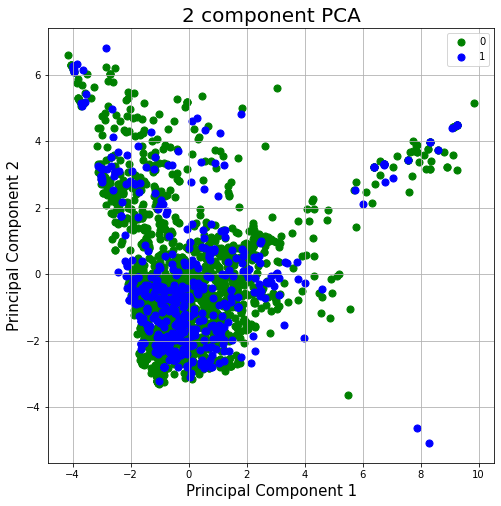

In [925]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1] # target values
colors = ['g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['day_night'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [601]:
# Kernel PCA
from sklearn.decomposition import KernelPCA

kpca = KernelPCA(n_components=2, random_state=1)
x_kpca = kpca.fit_transform(x)

kpca_data = kpca.fit_transform(cases_q3.loc[:,cases_q3.columns != 'day_night'])

In [602]:
principalDf = pd.DataFrame(data = x_kpca,
                           columns = ['principal component 1', 'principal component 2'])

In [603]:
principalDf.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
finalDf = pd.concat([principalDf, y], axis=1)

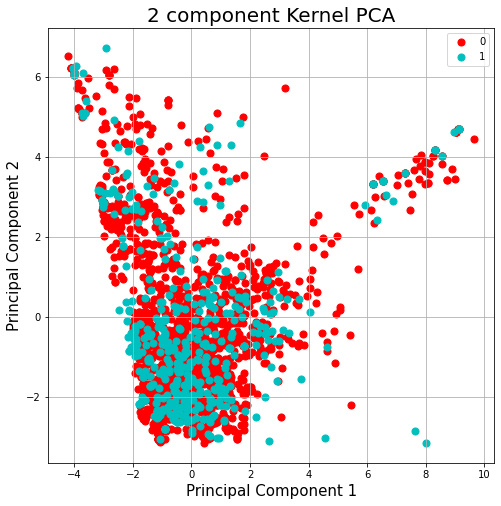

In [604]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component Kernel PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'c']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['day_night'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [605]:
# split the data into test and training sets, with 70% of samples being put into the training set
X_train, X_test, y_train, y_test = train_test_split(kpca_data, y, test_size=0.3, random_state=0)

In [628]:
# Logistic Regression after Kernel PCA
clf = LogisticRegression(penalty='l1', solver='liblinear')
clf.fit(X_train, y_train)
print('Coefficient of each feature:', clf.coef_)
print('Training accuracy:', clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))
print('')

Coefficient of each feature: [[-0.0009872  -0.22790484]]
Training accuracy: 0.7628571428571429
Test accuracy: 0.765



In [408]:
# Question 4
cars = cases['Request Details'].str.split('-').str[1]

In [492]:
# separating car brands by price levels
high = ['BMW','Mercedes','Audi','Tesla','Porsche','Ferrari','Land Rover',
        'Lamborghini','Maserati','Jaguar','Cadillac']
med = ['Acura','Lexus','Mini','Infiniti','Volvo']
low = ['Honda','Kia','Toyota','Hyundai','Ford','Nissan','Chevrolet',
       'Volkswagon','VW','Jeep','Mazda','Subaru']

In [568]:
# new dataframe with request type and car brands extracted from request details column
df_cars = pd.concat([cars,cases['Request Type']],axis=1).dropna()

In [569]:
req = df_cars['Request Details']

In [570]:
# labeling appropriate price levels for requests based on car brands
df_cars.loc[req.str.contains('|'.join(high)),'Price Level'] = 'High'
df_cars.loc[req.str.contains('|'.join(med)),'Price Level'] = 'Medium'
df_cars.loc[req.str.contains('|'.join(low)),'Price Level'] = 'Low'

In [944]:
# final cleaned dataset
data_cars = df_cars.dropna().reset_index(drop=True)
data_cars

,Request Details,Request Type,Price Level
0,Audi A7,Double_Parking,High
1,Honda Civic,Blocking_Driveway_Cite_Only,Low
2,Honda CR,Blocking_Driveway_Cite_Only,Low
3,Toyota Camry,Blocking_Driveway_Cite_Only,Low
4,Honda Civic,Parking_on_Sidewalk,Low
5,Honda Accord,Parking_on_Sidewalk,Low
6,Toyota minivan,Blocking_Driveway_Cite_Tow,Low
7,VW,Other_Illegal_Parking,Low
8,Subaru,Blocking_Driveway_Cite_Only,Low
9,Mercedes gl 550,Other_Illegal_Parking,High


In [692]:
# trying to see if there's a relationship between price level and request type
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer()
tfidf = tf_idf.fit_transform(data_cars['Request Type']).toarray()
tfidf

array([[0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0.

In [1062]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 9,random_state = 1)

In [1063]:
pca_tfidf = pca.fit_transform(tfidf)

/Users/sujin/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1122: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


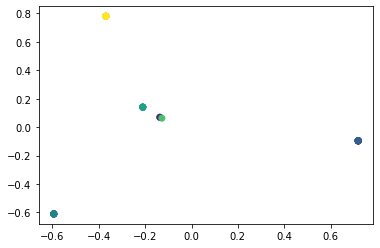

In [1064]:
labels = kmeans.fit_predict(pca_tfidf)
plt.scatter(pca_tfidf[:, 0], pca_tfidf[:, 1], c = labels);

In [713]:
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt

kpca = KernelPCA(n_components=2, random_state=1)
tfidf_kpca = kpca.fit_transform(tfidf)

##### Labeling Price Lev

In [714]:
high = data_cars.index[data_cars['Price Level'] == 'High']
med = data_cars.index[data_cars['Price Level'] == 'Medium']
low = data_cars.index[data_cars['Price Level'] == 'Low']

In [1021]:
data_cars.loc[data_cars['Price Level'] == 'High']

,Request Details,Request Type,Price Level
0,Audi A7,Double_Parking,High
9,Mercedes gl 550,Other_Illegal_Parking,High
15,Audi,Double_Parking,High
31,Audi station wagon,Blocking_Driveway_Cite_Tow,High
32,Mercedes Sedan,Blocking_Driveway_Cite_Only,High
38,BMW 4 door,Other_Illegal_Parking,High
46,"BMW, 328i",Other_Illegal_Parking,High


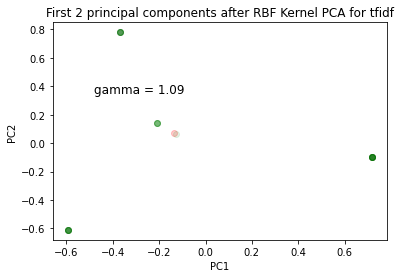

In [746]:
# set the transparency, but this may not work when we have larger data set
plt.scatter(tfidf_kpca[high,0], tfidf_kpca[high,1], color = 'red', alpha = 0.1)
plt.scatter(tfidf_kpca[med,0], tfidf_kpca[med,1], color = 'blue', alpha = 0.1)
plt.scatter(tfidf_kpca[low,0], tfidf_kpca[low,1], color = 'green', alpha = 0.1)

plt.text(-0.48, 0.35, 'gamma = 1.09', fontsize=12)
plt.title('First 2 principal components after RBF Kernel PCA for tfidf')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [1012]:
# separate by price level and cluster request type
from collections import Counter
# density of request type by high priced cars
# density is shown by the size of the points
x = tfidf_kpca[high,0]
y = tfidf_kpca[high,1]
c = Counter(zip(x,y)) # count same points
s = [10*c[(xx,yy)] for xx,yy in zip(x,y)] # scale

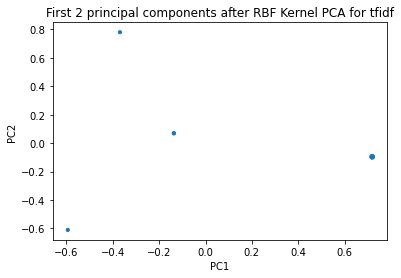

In [1013]:
plt.scatter(x, y, s=s)
plt.title('First 2 principal components after RBF Kernel PCA for tfidf')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [1027]:
# merge kpca and data_cars by price level (high)
x_coord = c.most_common(1)[0][0][0]
y_coord = c.most_common(1)[0][0][1]

car_index = np.where((tfidf_kpca[high,0] == x_coord) & (tfidf_kpca[high,1] == y_coord))

In [1040]:
# request type with the highest count
high_car = data_cars.loc[data_cars['Price Level'] == 'High']
high_car.reset_index(drop=True, inplace=True)
high_car.loc[(car_index[0][0]), data_cars.columns == 'Request Type']

Request Type    Other_Illegal_Parking
Name: 5, dtype: object

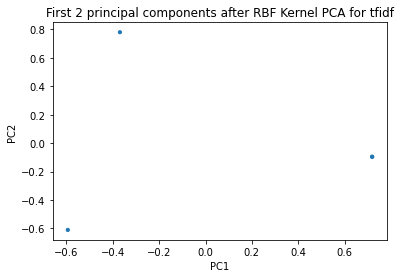

In [1041]:
# density of request type by medium priced cars
x = tfidf_kpca[med,0]
y = tfidf_kpca[med,1]
c = Counter(zip(x,y))
s = [10*c[(xx,yy)] for xx,yy in zip(x,y)]

plt.scatter(x, y, s=s)
plt.title('First 2 principal components after RBF Kernel PCA for tfidf')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [1042]:
# merge kpca and data_cars by price level (med)
x_coord = c.most_common(1)[0][0][0]
y_coord = c.most_common(1)[0][0][1]

car_index = np.where((tfidf_kpca[med,0] == x_coord) & (tfidf_kpca[med,1] == y_coord))

In [1045]:
# request type with the highest count
med_car = data_cars.loc[data_cars['Price Level'] == 'Medium']
med_car.reset_index(drop=True, inplace=True)
med_car.loc[(car_index[0][0]), data_cars.columns == 'Request Type']

Request Type    Other_Illegal_Parking
Name: 0, dtype: object

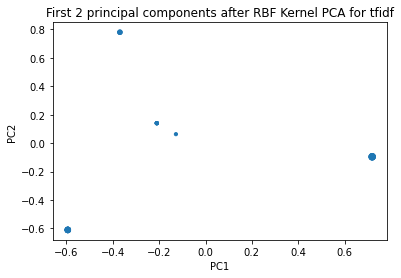

In [1053]:
# density of request type by low priced cars
x = tfidf_kpca[low,0]
y = tfidf_kpca[low,1]
c = Counter(zip(x,y))
s = [10*c[(xx,yy)] for xx,yy in zip(x,y)] # change multiplier 

plt.scatter(x, y, s=s)
plt.title('First 2 principal components after RBF Kernel PCA for tfidf')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [1054]:
# merge kpca and data_cars by price level (low)
x_coord = c.most_common(1)[0][0][0]
y_coord = c.most_common(1)[0][0][1]

car_index = np.where((tfidf_kpca[low,0] == x_coord) & (tfidf_kpca[low,1] == y_coord))

In [1055]:
# request type with the highest count
low_car = data_cars.loc[data_cars['Price Level'] == 'Low']
low_car.reset_index(drop=True, inplace=True)
low_car.loc[(car_index[0][0]), data_cars.columns == 'Request Type']

Request Type    Other_Illegal_Parking
Name: 30, dtype: object

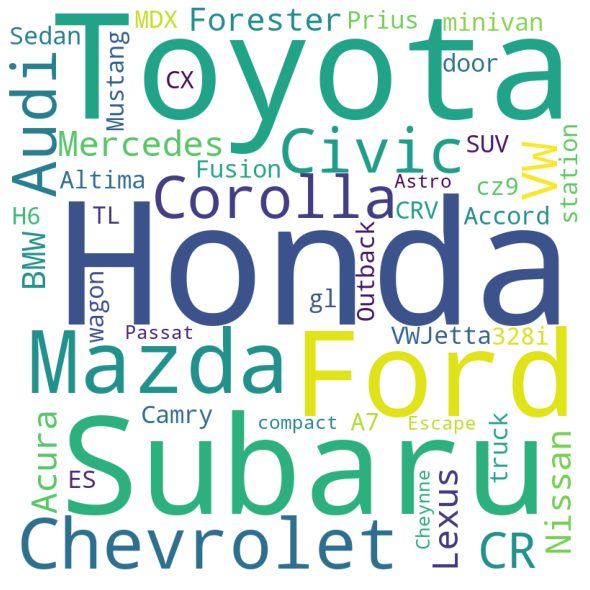

In [786]:
# word cloud for request type

from wordcloud import WordCloud

request_details = data_cars['Request Details'].to_string()

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10,
                random_state = 2).generate(request_details)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

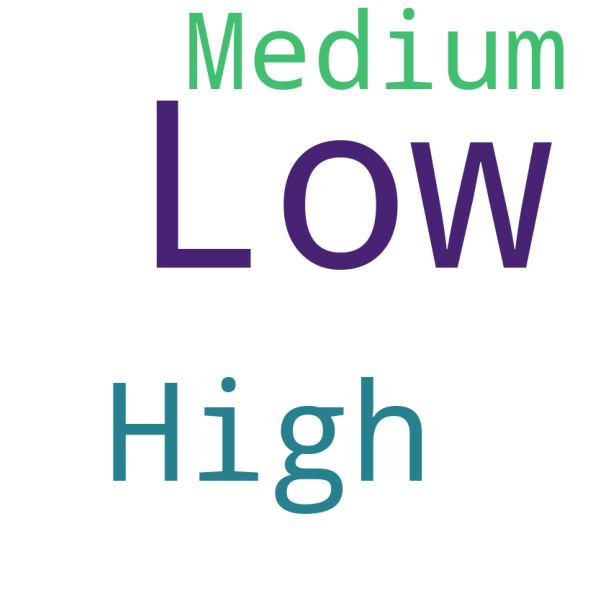

In [784]:
# word cloud by price level
price_level = data_cars['Price Level'].to_string()

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10,
                random_state = 1).generate(price_level)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

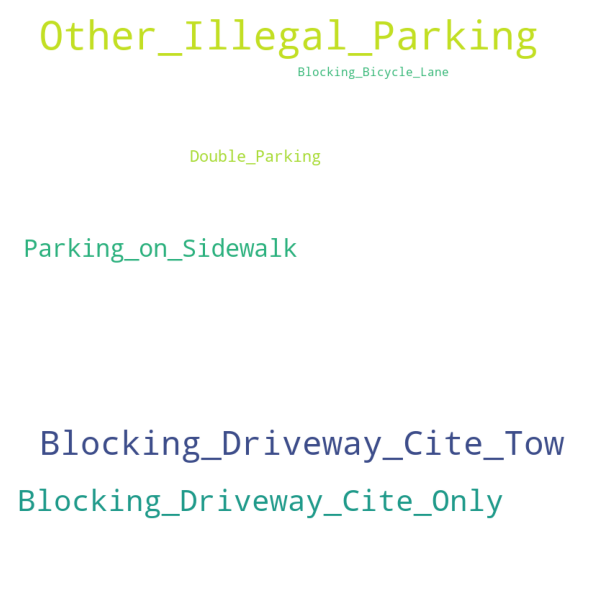

In [783]:
# word cloud by request type
req_type = data_cars['Request Type'].to_string()

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10,
                random_state = 3).generate(req_type)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)